<a href="https://colab.research.google.com/github/pvt-16/WeatherPerformanceProject/blob/main/DSF_2021_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as cal
import plotly.express as px
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
datasetT3 = pd.read_excel("T-measures.xlsx")

# Basic checks

In [ ]:
datasetT3.head()

,Jny Dt Rw,Bgl Prft Cent,Bgl Prof,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,CP6: Within 3 mins %,CP6: Within 15 mins %
0,2021-11-13,21000000,EUS-W/MIDS,BHAM INTL,28,37,37,75.68,100.0
1,2021-11-13,21000000,EUS-W/MIDS,BHAMNEWST,27,37,37,72.97,100.0
2,2021-11-13,21000000,EUS-W/MIDS,COVENTRY,26,37,37,70.27,100.0
3,2021-11-13,21000000,EUS-W/MIDS,EUSTON,32,37,37,86.49,100.0
4,2021-11-13,21000000,EUS-W/MIDS,MILTON KC,4,7,7,57.14,100.0


In [ ]:
datasetT3.isnull().sum()

Jny Dt Rw                0
Bgl Prft Cent            0
Bgl Prof                 0
Loc                      0
CP6: Within 3 mins       0
CP6: Within 15 mins      0
CP6: Count Trains Run    0
CP6: Within 3 mins %     0
CP6: Within 15 mins %    0
dtype: int64

In [ ]:
datasetT3.describe()
print(datasetT3.shape)

(22441, 9)


In [ ]:
datasetT3_modified = datasetT3.copy()

In [ ]:
#Extracting day, month, year
datasetT3_modified["Date"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).day
datasetT3_modified["Month"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).month
datasetT3_modified["Year"] = pd.DatetimeIndex(datasetT3.iloc[:,0]).year

In [ ]:
#datasetT3_modified["Month"] = datasetT3_modified["Month"].apply(lambda x: cal.month_abbr[x])

In [ ]:
datasetT3_modified.head()

,Jny Dt Rw,Bgl Prft Cent,Bgl Prof,Loc,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run,CP6: Within 3 mins %,CP6: Within 15 mins %,Day,Month,Year,Date
0,2021-11-13,21000000,EUS-W/MIDS,BHAM INTL,28,37,37,75.68,100.0,13,11,2021,13
1,2021-11-13,21000000,EUS-W/MIDS,BHAMNEWST,27,37,37,72.97,100.0,13,11,2021,13
2,2021-11-13,21000000,EUS-W/MIDS,COVENTRY,26,37,37,70.27,100.0,13,11,2021,13
3,2021-11-13,21000000,EUS-W/MIDS,EUSTON,32,37,37,86.49,100.0,13,11,2021,13
4,2021-11-13,21000000,EUS-W/MIDS,MILTON KC,4,7,7,57.14,100.0,13,11,2021,13


In [ ]:
datasetT3_modified.describe()
print(datasetT3_modified.shape)

(22441, 13)


# EDA on T-3 and T-15 data

In [ ]:
dtTrainsByDelayTimes = datasetT3_modified[["Year","Month","Date", "Loc", "CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"]]
dtTrainsByDelayTimes.head()

If some of the trains were not within 15 mins, then we can get the number of trains delayed beyond 15 mins by subtracting number of trains run that day by number of trains that arrived with 15 mins.

In [ ]:
dtTrainsByDelayTimes["trainsNotIn15"] = dtTrainsByDelayTimes["CP6: Count Trains Run"] - dtTrainsByDelayTimes["CP6: Within 15 mins"]
dtTrainsByDelayTimes.head()

#Trains delayed by more than 15 mins
dtTrainsByDelayTimes = dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0] #Remove zero

## Grouped by Month

In [ ]:
datasetT3_groupedByMonth = datasetT3_modified.groupby("Month")
#datasetT3_modified["CP6: Count Trains Run"].shape

### November

In [ ]:
datasetT3_Nov = datasetT3_modified[datasetT3_modified.Month == 11]
datasetT3_Nov.shape

(1342, 13)

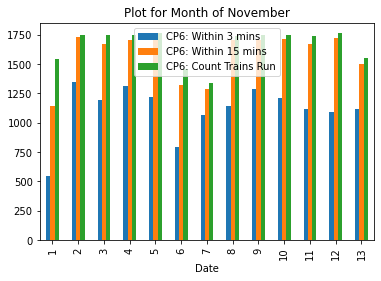

In [ ]:
datasetT3_Nov.groupby("Date")["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Plot for Month of November")

In [ ]:
# dtTrainsByDelayTimes_groupedByMonth = dtTrainsByDelayTimes.groupby("Month")
# dtTrainsByDelayTimes_Nov = dtTrainsByDelayTimes[dtTrainsByDelayTimes.Month == 11]
# dtTrainsByDelayTimes_Nov.shape
# dtTrainsByDelayTimes_Nov.groupby("Date")["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Plot for Month of November")

### All Month-wise 

In [ ]:
dtTrainsByDelayTimesByMonth = dtTrainsByDelayTimes.groupby("Month")

In [ ]:
#sns.barplot(x="Date", y="trainsNotIn15", label="Month", data=dtTrainsByDelayTimes)
#dtTrainsByDelayTimes["Month"]<6

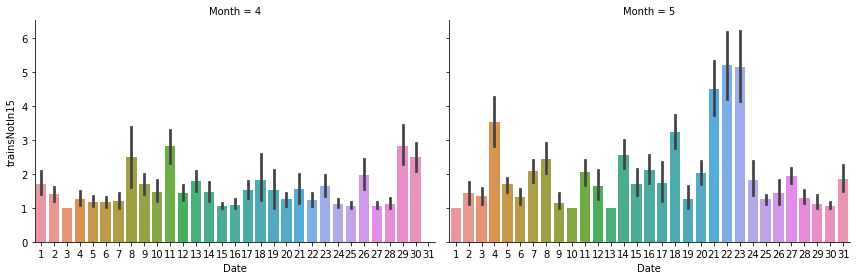

In [ ]:
g = sns.catplot(x="Date", y="trainsNotIn15",
                col="Month",
                data=dtTrainsByDelayTimes[dtTrainsByDelayTimes["Month"]<6], 
                kind="bar",
                height=4, aspect=1.5
                );

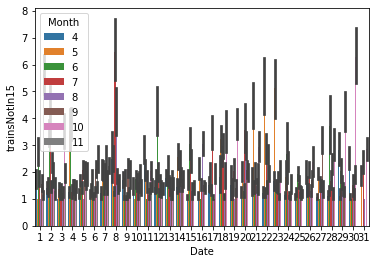

In [ ]:
sns.barplot(x="Date", y="trainsNotIn15", hue="Month", data=dtTrainsByDelayTimes)

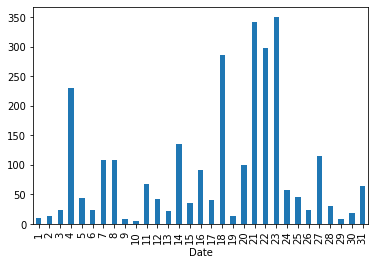

In [ ]:
dtTrainsByDelayTimes[dtTrainsByDelayTimes["Month"]==5].groupby(["Date"])["trainsNotIn15"].sum().plot.bar()

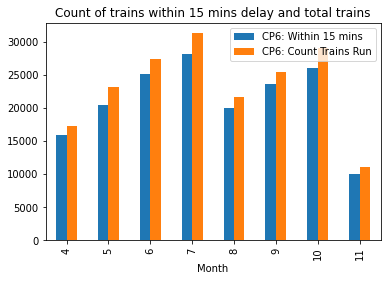

In [ ]:
dtTrainsByDelayTimesByMonth["CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar(title ="Count of trains within 15 mins delay and total trains")

In [ ]:
dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"] >0].count()
dtTrainsByDelayTimes.shape

(7834, 8)

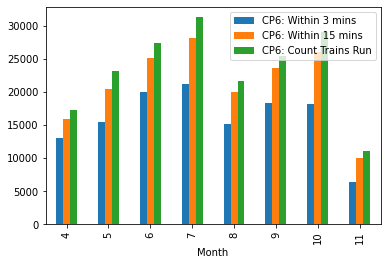

In [ ]:
dtTrainsByDelayTimes.groupby("Month")["CP6: Within 3 mins", "CP6: Within 15 mins", "CP6: Count Trains Run"].sum().plot.bar()

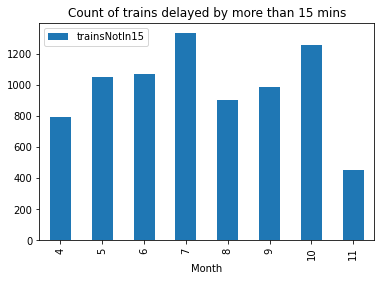

In [ ]:
dtTrainsByDelayTimesByMonth["trainsNotIn15"].count().plot.bar(legend=True, title="Count of trains delayed by more than 15 mins")

Highest delay seen in July > October

In [ ]:
#plt.bar(dtTrainsByDelayTimes["Month"], (dtTrainsByDelayTimes["trainsNotIn15"] >0))

In [ ]:
#dtTrainsByDelayTimes[dtTrainsByDelayTimes["trainsNotIn15"]>0][dtTrainsByDelayTimes["Month"]==11]

In [ ]:
#Incorrect graph - Nov has only 448 rows but this shows the row number equivalent value
fig = px.bar(dtTrainsByDelayTimes, x='Month', y='trainsNotIn15')
fig.show()

In [ ]:
#plt.bar(datasetT3_modified["Month"], datasetT3_modified["CP6: Within 3 mins"])

## Grouped by Location

In [ ]:
dtTrainsByDelayTimes_groupedByLocation = dtTrainsByDelayTimes.groupby("Loc")

<Figure size 432x288 with 0 Axes>

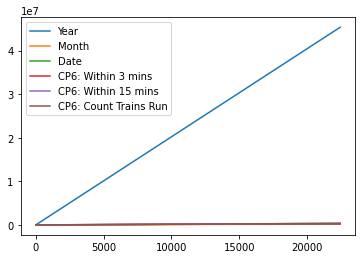

In [ ]:
df = dtTrainsByDelayTimes.cumsum()
plt.figure()
df.plot()

In [ ]:
dtTrainsByDelayTimes_groupedByLocation.count()

,Year,Month,Date,CP6: Within 3 mins,CP6: Within 15 mins,CP6: Count Trains Run
Loc,,,,,,
ALSAGER,2,2,2,2,2,2
BANGOR,224,224,224,224,224,224
BHAM INTL,633,633,633,633,633,633
BHAMNEWST,823,823,823,823,823,823
BLETCHLEY,1,1,1,1,1,1
BPOOL NTH,339,339,339,339,339,339
CARLISLE,449,449,449,449,449,449
CARSTSSJN,2,2,2,2,2,2
CHESTER,235,235,235,235,235,235


Loc
ALSAGER      AxesSubplot(0.125,0.125;0.775x0.755)
BANGOR       AxesSubplot(0.125,0.125;0.775x0.755)
BHAM INTL    AxesSubplot(0.125,0.125;0.775x0.755)
BHAMNEWST    AxesSubplot(0.125,0.125;0.775x0.755)
BLETCHLEY    AxesSubplot(0.125,0.125;0.775x0.755)
BPOOL NTH    AxesSubplot(0.125,0.125;0.775x0.755)
CARLISLE     AxesSubplot(0.125,0.125;0.775x0.755)
CARSTSSJN    AxesSubplot(0.125,0.125;0.775x0.755)
CHESTER      AxesSubplot(0.125,0.125;0.775x0.755)
COLWYNBAY    AxesSubplot(0.125,0.125;0.775x0.755)
COVENTRY     AxesSubplot(0.125,0.125;0.775x0.755)
CREWE        AxesSubplot(0.125,0.125;0.775x0.755)
EDINBURGH    AxesSubplot(0.125,0.125;0.775x0.755)
EUSTON       AxesSubplot(0.125,0.125;0.775x0.755)
FLINT        AxesSubplot(0.125,0.125;0.775x0.755)
GLASGOW C    AxesSubplot(0.125,0.125;0.775x0.755)
HARROWWLD    AxesSubplot(0.125,0.125;0.775x0.755)
HAYMARKET    AxesSubplot(0.125,0.125;0.775x0.755)
HOLYHEAD     AxesSubplot(0.125,0.125;0.775x0.755)
KILMARNCK    AxesSubplot(0.125,0.125;0.775x0.7

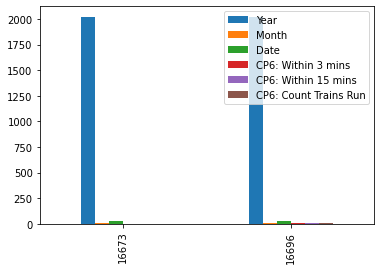

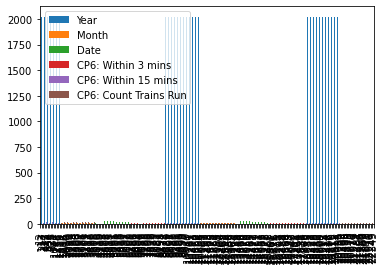

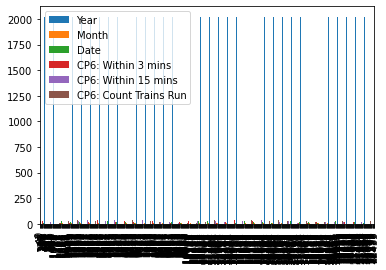

Error in callback <function flush_figures at 0x7f5cad2380e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
dtTrainsByDelayTimes_groupedByLocation.plot.bar()